# Решение кейса "Прогноз оттока клиентов банка на основе транзакционной активности"

## Этап 1:

Устанавливаем нужные библиотеки, на данном этапе: matplotlib, pandas, numpy

In [ ]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


Импортируем модули

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Считываем файл с данными с помощью pandas, для дальнейшей работы с данными. Выводим их

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


Считаем пропуски в каждом столбце

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

Удаляем пропуски, т.к. их очень мало и они не повлияют на обучение модели.

In [ ]:
df = df.dropna()

Пишем функции для построения диаграмм. Для всех признаков будем использовать столбчатые диаграммы т.к. они наиболее точно отображают соотношения значений. Для поиска выбросов пишем функцию построения boxplot

In [ ]:
def histogram(column):        #Строим гистограммы для числовых признаков
  fig, ax = plt.subplots()
  ax.hist(df[column], color = 'blue', edgecolor = 'black')
  ax.set_title(column)
  ax.set_ylabel('frequency')
  plt.show()

def boxplot(column):             #Строим boxplot для поиска выбросов
  fig, ax = plt.subplots()
  ax.boxplot(df[column])
  ax.set_title(column)
  plt.show()

def plot_categorial(column):             #Строим график для категориальных признаков
  labels = df[column].unique()
  fig, ax = plt.subplots()
  y = []
  for i in labels:
    y.append(df[column].value_counts()[i])
  ax.bar(labels, y)
  ax.set_title(column)
  ax.set_ylabel('frequency')
  plt.show()

def plot_boolean(column):               #Строим график для булевых значений
  labels = ['Yes', 'No']
  fig, ax = plt.subplots()
  y = [df[column].value_counts()[1], df[column].value_counts()[0]]
  ax.bar(labels, y)
  ax.set_ylabel('frequency')
  ax.set_title(column)
  plt.show()

Строим графики для всех признаков кроме "RowNumber"	"CustomerId"	"Surname" т.к. они не являются значимыми

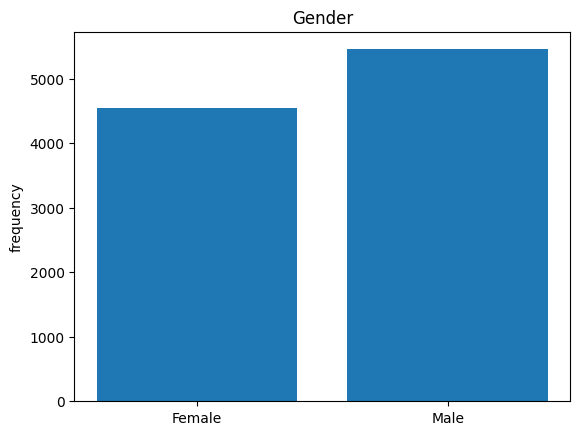

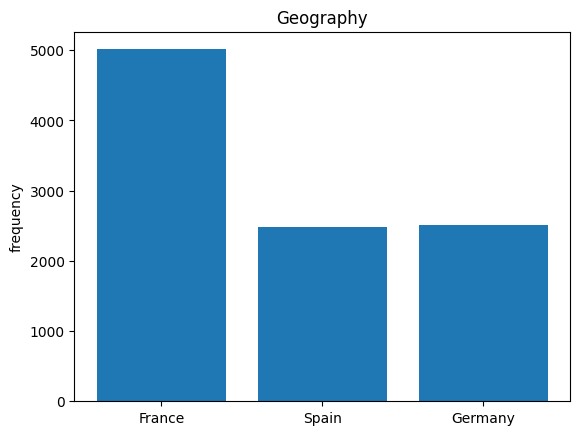

In [ ]:
plot_categorial('Gender')
plot_categorial('Geography')

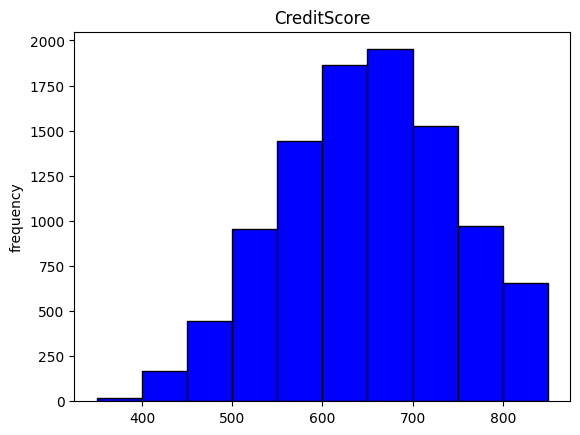

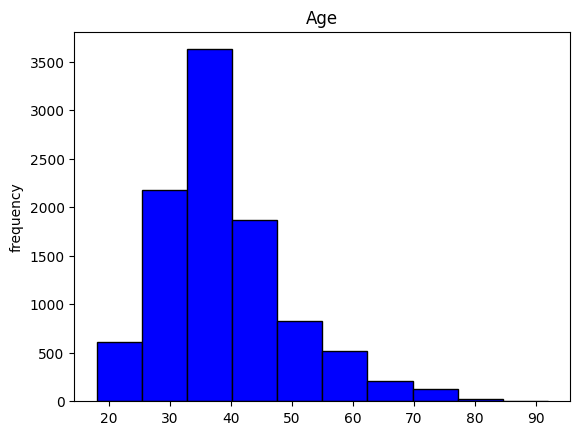

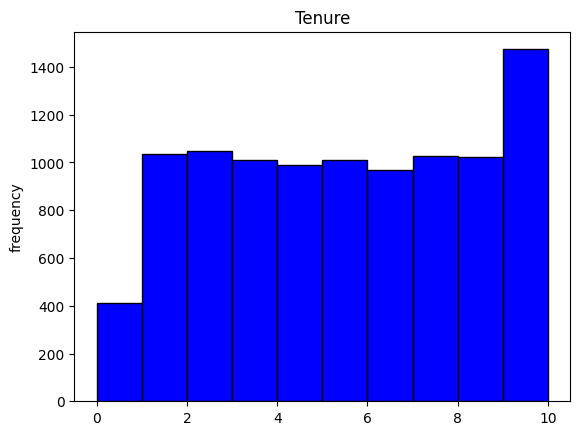

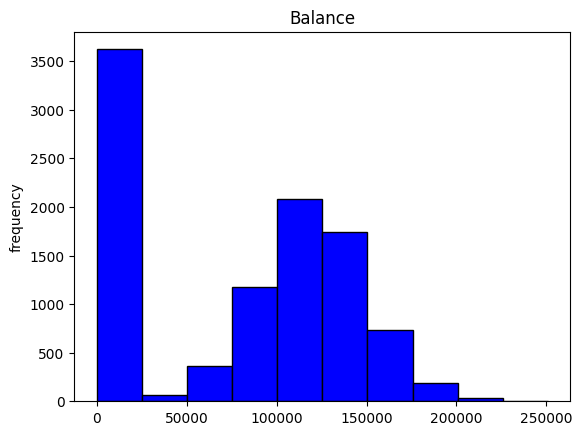

In [ ]:
histogram('CreditScore')
histogram('Age')
histogram('Tenure')
histogram('Balance')

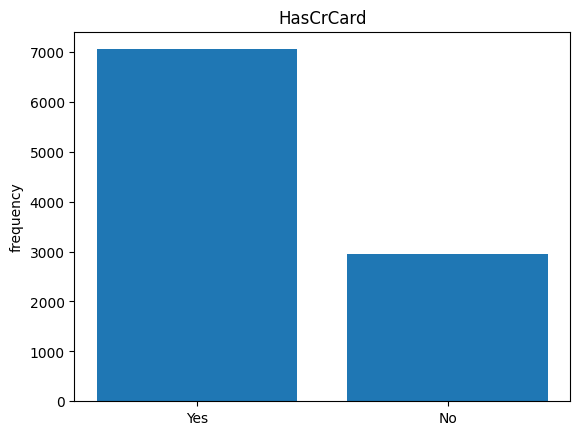

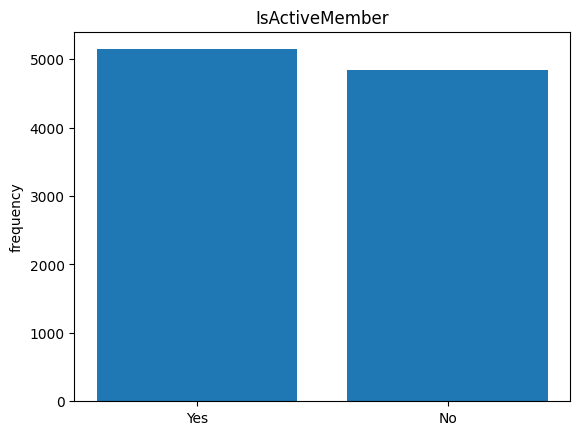

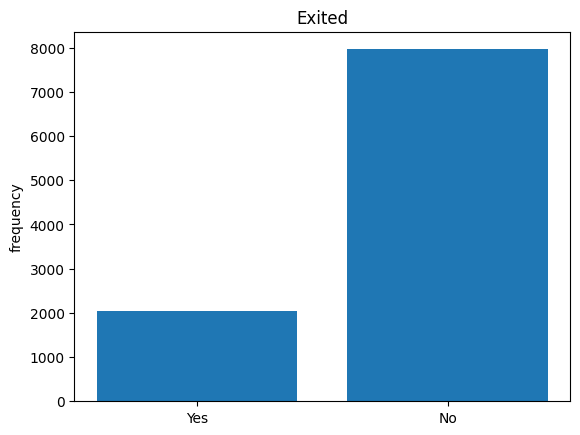

In [ ]:
plot_boolean('HasCrCard')
plot_boolean('IsActiveMember')
plot_boolean('Exited')

Строим boxplot для признаков в которых могут быть выбросы. Из результата видим, что в возрасте много значений выходит за предел 3-го квартиля, но нет невозможных значений, значит эти значения не являются выбросами. Также есть несколько значений кредитного рейтинга, которые выходят за предел 1-ого квартиля, но они также не являются выбросами, т.к. такие значения могут быть реальными.

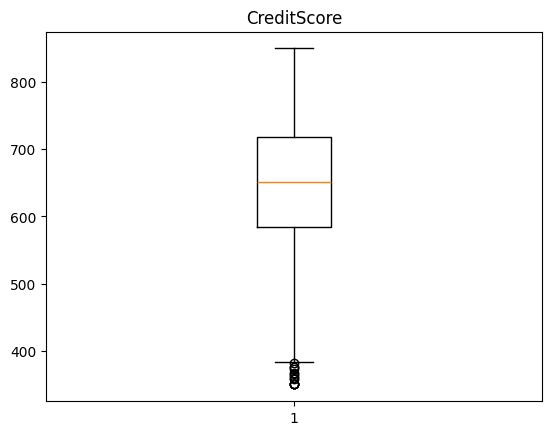

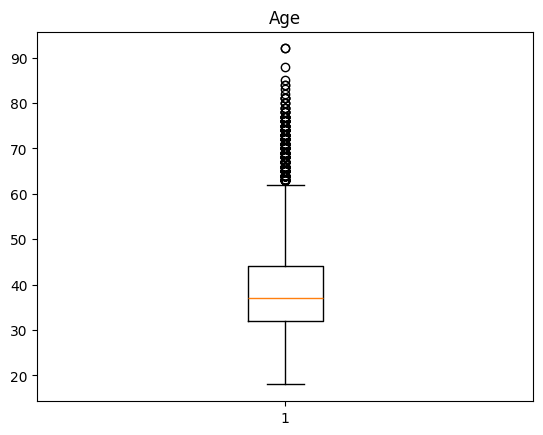

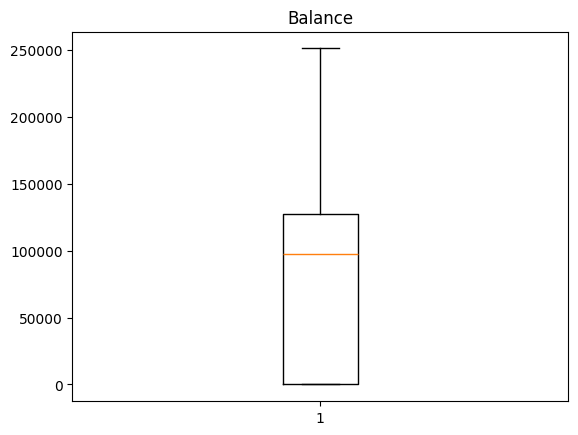

In [ ]:
boxplot('CreditScore')
boxplot('Age')
boxplot('Balance')

Для построения матрицы корреляции нужно избавиться от категориальных признаков. В случае со странами можно использовать one_hot encoding, т.к. уникальных значений всего 3. Для пола используем label_encoding т.к. значения всего 2.

In [ ]:
pd.get_dummies(df['Geography'])
df = pd.concat([df, pd.get_dummies(df['Geography'])], axis=1)
df = df.reindex(columns=['RowNumber', 'CustomerId', 'CreditScore', 'France', 'Germany', 'Spain', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'])
df = df.drop(['Geography', 'Germany'], axis=1)

In [ ]:
def Gender_to_bool(gender):
  if gender == 'Female':
    return True
  else:
    return False

In [ ]:
df['Gender'] = df['Gender'].apply(Gender_to_bool)

Строим матрицу корреляции. Из результата видим: Чаще уходят люди из Германии, мужчины и особенно те, кто старше. Также, чем выше баланс, тем выше шанс, что человек уйдет из банка. Клиенты из Франции уходят чаще. Остальные признаки не имеют особой важности.

<Axes: >

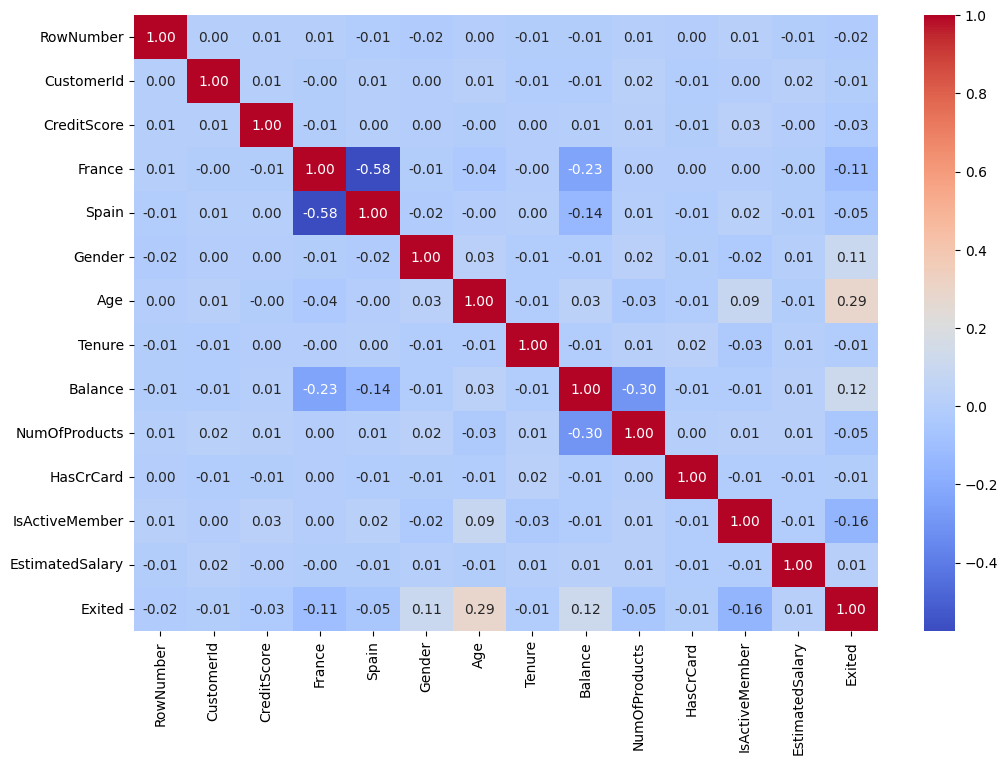

In [ ]:
plt.figure(figsize=(12, 8))
df.corr()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Определяем данные для обучения

In [ ]:
y = df['Exited']
X = df.drop(['Exited', 'RowNumber', 'CustomerId'], axis=1)


Разделяем датасет, для обучения используем 70% данных, а для теста 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train_valid = pd.DataFrame(X_train)
y_train_valid = pd.DataFrame(y_train)
y_train_valid = y_train_valid['Exited']

Масштабируем числовые признаки

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train_valid[num_cols] = scaler.transform(X_train_valid[num_cols])

Из-за того, что у нас наблюдается сильный дисбаланс классов, используем Oversampling (Smote) минорного признака.

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)


Обучаем 1-ую модель методом случайных деревьев

In [ ]:
grid_space={'max_depth':[5,10,30, 50, None],
              'n_estimators':[10,100,200, 300],
              'max_features':[2,3,5,7],
              'min_samples_leaf':[2,3, 4],
              'min_samples_split':[2,3]
           }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

md = RandomForestClassifier()

grid = GridSearchCV(md,param_grid=grid_space,cv=3,scoring='roc_auc')
model_grid = grid.fit(X_train, y_train)

In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300}
Best score is: 0.955446487069796


In [ ]:
md = RandomForestClassifier(max_depth = None, min_samples_split=3, n_estimators=300, min_samples_leaf=2, max_features=2)
md = md.fit(X_train, y_train)

Выводим метрики

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred = md.predict(X_test)
y_pred_proba = md.predict_proba(X_test)[: ,1]


print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred_proba)}')
print(classification_report(y_test, y_pred))

Метрика roc-auc на валидационных данных имеет значение: 0.8562964217945243
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2380
           1       0.61      0.62      0.62       620

    accuracy                           0.84      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.84      0.84      0.84      3000



Так как нам важно точнее предсказать уход клиента, можно пожертвовать precision и установить порог класиффикации, так чтобы recall был на уровне 0.75

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(recalls <= 0.75)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred_proba >= optimal_threshold).astype(int)

In [ ]:
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred_proba)}')
print(classification_report(y_test, y_pred))

Метрика roc-auc на валидационных данных имеет значение: 0.8562964217945243
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2380
           1       0.50      0.75      0.60       620

    accuracy                           0.79      3000
   macro avg       0.71      0.78      0.73      3000
weighted avg       0.84      0.79      0.81      3000



Обучаем 2-ую модель логистической регрессией.

In [ ]:
from sklearn.linear_model import LogisticRegression

md2 = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
md2 = md2.fit(X_train, y_train)

Выводим Метрики

In [ ]:
y_pred2 = md2.predict(X_test)

y_pred2_proba = md2.predict_proba(X_test)[: ,1]

print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred2_proba)}')
print(classification_report(y_test, y_pred2))

Метрика roc-auc на валидационных данных имеет значение: 0.7621272702629439
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      2380
           1       0.37      0.65      0.47       620

    accuracy                           0.70      3000
   macro avg       0.63      0.68      0.63      3000
weighted avg       0.78      0.70      0.72      3000



Проводим кросс-валидацию для моделей

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(md, X_train_valid, y_train_valid, cv=5, scoring='roc_auc')
print("Кросс-валидация (Random Forest) ROC-AUC:")
print(cv_scores_rf)
print("Среднее ROC-AUC:", cv_scores_rf.mean().round(3))



Кросс-валидация (Random Forest) ROC-AUC:
[0.8739872  0.83641905 0.84134421 0.81696366 0.84964284]
Среднее ROC-AUC: 0.844


In [ ]:
cv_scores_lr = cross_val_score(md2, X_train_valid, y_train_valid, cv=5, scoring='roc_auc')
print("Кросс-валидация (Logistic Regression) ROC-AUC:")
print(cv_scores_lr)
print("Среднее ROC-AUC:", cv_scores_lr.mean().round(3))

Кросс-валидация (Logistic Regression) ROC-AUC:
[0.78841373 0.75008834 0.7807436  0.76063237 0.76590106]
Среднее ROC-AUC: 0.769


Строим ROC-Кривые

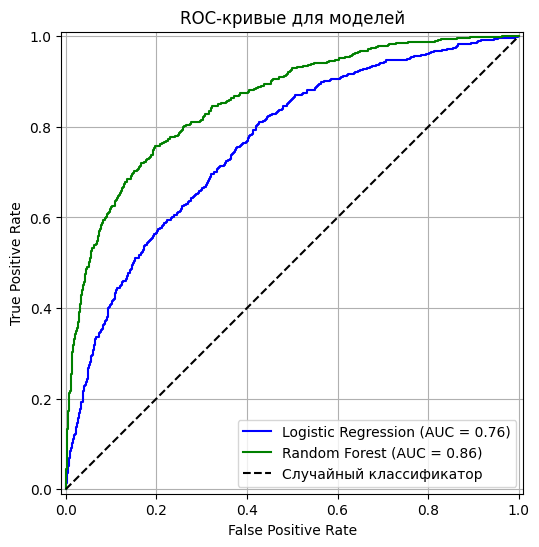

In [ ]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 6))

# ROC для логистической регрессии
RocCurveDisplay.from_estimator(
    md2, X_test, y_test,
    name='Logistic Regression',
    color='blue',
    ax=plt.gca()
)

# ROC для случайного леса
RocCurveDisplay.from_estimator(
    md, X_test, y_test,
    name='Random Forest',
    color='green',
    ax=plt.gca()
)

plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей')
plt.legend()
plt.grid(True)
plt.show()


Строим Confusion матрицы для каждой модели

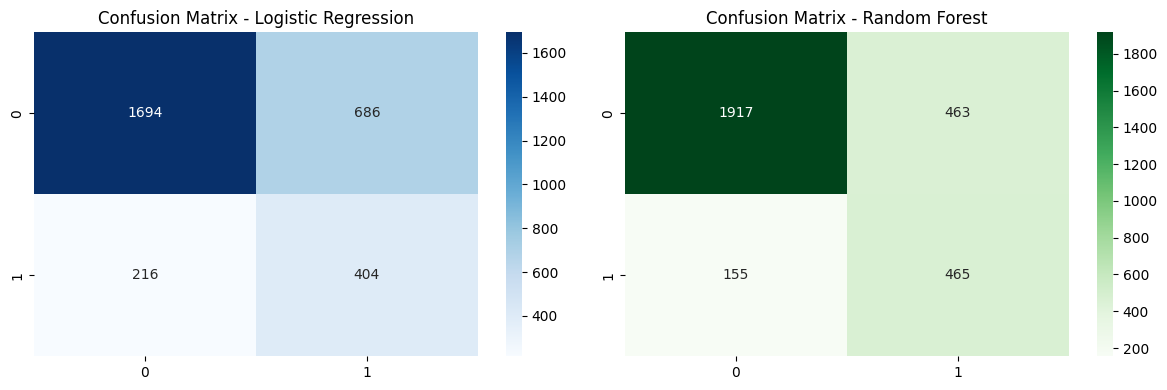

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')

# Confusion Matrix для Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()

Строим график важности признаков (RandomForest)

dict_keys([])


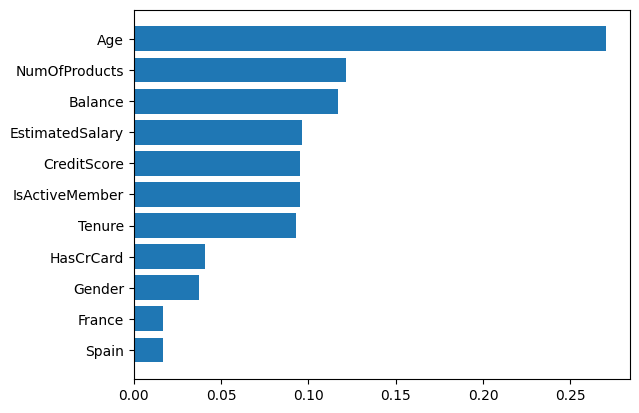

In [ ]:
importance = {}

print(importance.keys())

for i in range(len(md.feature_importances_)):
    importance[X_train.columns[i]] = md.feature_importances_[i]

importance = dict(sorted(importance.items(), key=lambda item: item[1]))

plt.barh(importance.keys(), importance.values(), )
plt.show()

## Результаты работы:

Из результатов мы видим, что наиболее значимыми признаками оказались: возраст, баланс, количество продуктов, зарплата, кредитный рейтинг.
Для решения проблемы с уходом возрастных людей, можно ввести льготы для людей получающих пенсию на карты нашего банка, возможно ввести кешбек в наиболее посещаемых пенсионерами местах. Для улучшения ситуации с балансом можно поощрять людей за удержание денег на счету, например, ввести бесплатное обслуживание счета для клиентов с определенной суммой на балансе. Также нужно поощрать клиентов с большим количество продуктов от банка, например, увеличить кешбек на дебетовом счету, если клиент пользуется кредитной картой, увеличить процент по вкладу для пользователей брокерским счетом.
Также стоит увеличить кешбек на товары среднего и низкого класса, а также ввести беспроцентный период по кредитным картам, так можно привлечь клиентов с низкой заработной платой, а также ввести доступ в зоны бизнеса-класса аэропортов и бесплатный доступ на крупные бизнес мероприятия для обладателей больших капиталов, что поможет нам удержать клиентов с большим заработком.